In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Reading the data 

In [ ]:
# Reading review_sentiment.csv file which also contains the cleaned review text.
df_phonedata_cleaned = pd.read_csv('/content/drive/My Drive/sentiment_analysis/review_sentiment.csv')

In [ ]:
df_phonedata_cleaned.shape

(61946, 13)

In [ ]:
df_phonedata_cleaned.head(3)

,overall,verified,reviewerID,asin,reviewText,asin.1,unixReviewTime,category,also_view,brand,price,review_sentiment,cleaned_reviewText
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,B0000E3GWH,1095724800,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,NEGATIVE,phone ugly heavy terrible user interface techi...
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V205 and then I decided to t...,B0000E3GWH,1090627200,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,POSITIVE,samsung v205 decided try e715 fyi people batte...
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,This is the first Samsung phone I have had and...,B0000E3GWH,1089072000,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,NEGATIVE,samsung phone not measure v300 am tmobile cust...


In [ ]:
#review_df is a dataframe which will hold completely cleaned reviews and the sentiment labels
review_df = df_phonedata_cleaned[['cleaned_reviewText','review_sentiment']]
review_df.head()

,cleaned_reviewText,review_sentiment
0,phone ugly heavy terrible user interface techi...,NEGATIVE
1,samsung v205 decided try e715 fyi people batte...,POSITIVE
2,samsung phone not measure v300 am tmobile cust...,NEGATIVE
3,i'm europe phones networks better samsung curr...,POSITIVE
4,phone amazingly light camera phone flashlight ...,POSITIVE


In [ ]:
#Converting string - 'POSITIVE' and 'NEGATIVE' to 1 and 0 respectively as we need numerical labels for further processing
review_df['binary_review_sentiment'] = review_df['review_sentiment'].apply(lambda x: 0 if x == 'NEGATIVE' else 1)
review_df.head()

,cleaned_reviewText,review_sentiment,binary_review_sentiment
0,phone ugly heavy terrible user interface techi...,NEGATIVE,0
1,samsung v205 decided try e715 fyi people batte...,POSITIVE,1
2,samsung phone not measure v300 am tmobile cust...,NEGATIVE,0
3,i'm europe phones networks better samsung curr...,POSITIVE,1
4,phone amazingly light camera phone flashlight ...,POSITIVE,1


In [ ]:
review_df.isnull().sum() # Checking for null values

cleaned_reviewText         0
review_sentiment           0
binary_review_sentiment    0
dtype: int64

In [ ]:
# Defining X and y as lists for training the model
X = review_df['cleaned_reviewText'].to_list()
y = review_df['binary_review_sentiment'].to_list()

# Building a Naive Bayes model
Covert the textual data to numerical features which can later be used to train any ML/AI model. Here we implement the Bag of Words method to extract features out of the text using CountVectorizer.

# Model 1




In [ ]:
# splitting the data into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
#Distribution of the data.
print(pd.Series(y).value_counts())

1    46370
0    15576
dtype: int64


In [ ]:
#Distribution of the data in terms of proportions.
print("Percent of 1s: ", 100*pd.Series(y).value_counts()[1]/pd.Series(y).value_counts().sum(), "%")
print("Percent of 0s: ", 100*pd.Series(y).value_counts()[0]/pd.Series(y).value_counts().sum(), "%")

Percent of 1s:  74.85551932328157 %
Percent of 0s:  25.144480676718434 %


In [ ]:
# Convert text to features
# creating an object of CountVectorizer - vect
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# printing the vocabulary
vect.vocabulary_

{'size': 28994,
 'weight': 34760,
 'starter': 30157,
 'lots': 19545,
 'people': 23635,
 'like': 19195,
 'women': 35188,
 'wear': 34692,
 'phone': 23886,
 'pockets': 24335,
 'nokia': 21974,
 '20': 668,
 'appeal': 3976,
 'larger': 18790,
 'audience': 4473,
 'stands': 30128,
 'good': 15001,
 'geeks': 14625,
 'palms': 23264,
 'baggy': 5226,
 'clothes': 7907,
 'great': 15256,
 'product': 25008,
 'galaxy': 14480,
 's4': 27617,
 'best': 5705,
 'screen': 28053,
 'blows': 6046,
 'apple': 4002,
 'iphone': 17814,
 '5s': 1803,
 'own': 23137,
 'love': 19568,
 'widgets': 34962,
 'excelent': 12629,
 'buenisimo': 6600,
 'los': 19530,
 'recomiendo': 26200,
 'ojos': 22479,
 'cerrados': 7360,
 'update': 33654,
 '10': 86,
 '16': 442,
 'camera': 6961,
 'becoming': 5536,
 'issue': 17948,
 'using': 33791,
 'work': 35240,
 'photos': 23955,
 'care': 7110,
 'am': 3574,
 'seriously': 28389,
 'considering': 8673,
 'getting': 14724,
 'changing': 7424,
 'plans': 24184,
 'continue': 8780,
 'mediocre': 20272,
 'real'

In [ ]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

**A Multinomial Naive Bayes** 

Multinomial Naive Bayes is useful to model feature vectors where each value represents the number of occurences of a particular term in a document. Whereas, in case of Bernoulli Naive Bayes, the random variable X can assume only binary values.

Hence, for our case, where we need to account for a term occuring multiple times in a particular review, a Multinomial Naive Bayes model would make more sense.


In [ ]:
# Training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

#Applying the model on train set too
y_pred_train = mnb.predict(X_train_transformed) # returns classes 0 and 1

y_pred_proba_tr = mnb.predict_proba(X_train_transformed) # returns the probability of a review being positive

# predict sentiment
y_pred = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [ ]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Model evaluation on the test data set

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# printing the overall accuracy 
from sklearn import metrics
print("Accuracy for train set is: ", metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy for test set is: ", metrics.accuracy_score(y_test, y_pred))

Accuracy for train set is:  0.8838545814589208
Accuracy for test set is:  0.8653709562859172


Confusion matrix for train and test set


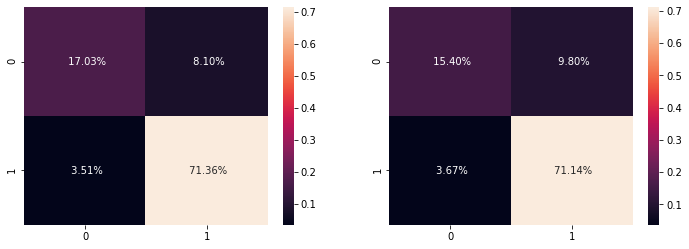

In [ ]:
#Confusion matrix for the train data
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion matrix for train and test set")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# confusion matrix for train set
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train/np.sum(cm_train), annot=True , fmt = ' .2%')
# help(metrics.confusion_matrix)

plt.subplot(1,2,2)
# confusion matrix for the test data
cm_test = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test/np.sum(cm_test), annot=True , fmt = ' .2%')

plt.show()

Confusion Matrix is a tool to determine the performance of classifier. It contains information about actual and predicted classifications. Figure below gives a glimpse of a confusion matrix

In [ ]:
# storing the values in variables  

#For train set
TN_tr = cm_train[0, 0] 
FP_tr = cm_train[0, 1]
FN_tr = cm_train[1, 0]
TP_tr = cm_train[1, 1]

#for test set
TN = cm_test[0, 0]
FP = cm_test[0, 1]
FN = cm_test[1, 0]
TP = cm_test[1, 1]


**Sensitivity (True Positive Rate)** is a measure of the proportion of actual positive cases that got predicted as positive.

**Specificity (True Negative Rate)** is defined as the proportion of actual negatives, which got predicted as the negative (or true negative).

Sensitivity and Specificity measures are used to plot the **ROC curve**. And, Area under ROC curve (AUC) is used to determine the model performance. 


`True Positive Rate = True Positives / (True Positives + False Negatives)`




`False Positive Rate = False Positives / (False Positives + True Negatives)`

For this particular problem, the metrics that have been chosen are sensitivity and specificity. The reason being, you do not want to make the same mistake as your competitor that had resulted in a negative sentiment of the customer (specificity), and at the same time your product should also cover the aspects that have resulted in positive sentiment for the competitor products (sensitivity)

In [ ]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#for train set
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate_tr, true_positive_rate_tr)

#for test set
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
# area under the curve 
print ("for train set: ",roc_auc_tr)
print ("for test set: ",roc_auc)


for train set:  0.9256567688408462
for test set:  0.8975773852568772


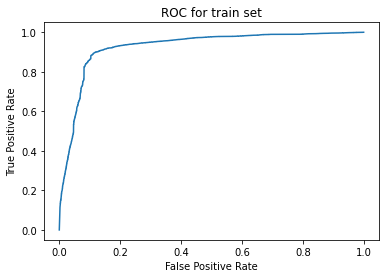

In [ ]:
# plotting the ROC curve for train set
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for train set')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

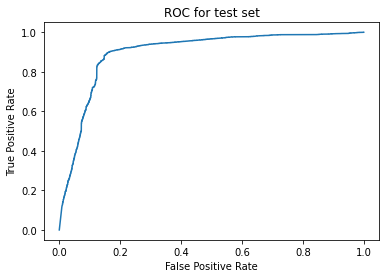

In [ ]:
# plotting the ROC curve for test set
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for test set')
plt.plot(false_positive_rate, true_positive_rate)

In [ ]:
#Calculating the Sensitivity for train and test set
sensitivity_tr = TP_tr / float(FN_tr + TP_tr)
print("sensitivity for train set: ",sensitivity_tr)
sensitivity = TP / float(FN + TP)
print("sensitivity for test set: ",sensitivity)

sensitivity for train set:  0.9530544775046715
sensitivity for test set:  0.9509710832973672


In [ ]:
#specificity for test and train set. 
specificity_tr = TN_tr / float(TN_tr + FP_tr)
print("specificity for train set: ",specificity_tr)
specificity = TN / float(TN + FP)
print("specificity for test set: ",specificity)

specificity for train set:  0.6776597567243448
specificity for test set:  0.6112250128139416



Since the distribution of the dataset is imbalanced with more positives, many reviews which were negative were incorrectly classified as positives by the NB model and hence the low specificity. From a business point of view, this is not a very good model as you will miss out on the negatives of your competitors. Knowing the weaknesses of your competitors help you design better features for the product and devise your marketing strategies accordingly.

In [ ]:
# Printing the classification report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred))

report for train set
              precision    recall  f1-score   support

           0       0.83      0.68      0.75     11674
           1       0.90      0.95      0.92     34785

    accuracy                           0.88     46459
   macro avg       0.86      0.82      0.84     46459
weighted avg       0.88      0.88      0.88     46459

report for test set
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      3902
           1       0.88      0.95      0.91     11585

    accuracy                           0.87     15487
   macro avg       0.84      0.78      0.80     15487
weighted avg       0.86      0.87      0.86     15487



Macro average is just the average of performance metrics of both the classes where as the weighted average assigns weights to the metrics of the classes according to their distribution in the original dataset. Macro and weighted averages are more useful in a multi-class calssification problems because in case of a binary classification, we already know what our positive and negative classes are, to evaluate the model performance.

# Model 2: With Oversampling 
A skewed data is the one where there are more training examples for one class than another. This was evident from the specificity which was calculated in the model above. This can cause the decision boundary weights to be biased. This causes
the classifier to unwittingly prefer one class over the
other.

We have shown the reason for the bias in the previous model and propose to alleviate the problem by using a method called **Random oversampling**. Random oversampling involves randomly selecting samples from the minority class (in our case 0s), with replacement, and adding them to the training dataset such that there is an equal distribution of the classes. 



In [ ]:
# splitting the data into test and train
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
pd.Series(y_train).value_counts()

1    34785
0    11674
dtype: int64

Why oversampling is done only on training set? <br>If both the train and test data are oversampled, we may end up having same points in both the sets. Hence the model performance obtained cannot be reliable as the test set is not independent of the train set.

In [ ]:
#from imblearn import over_sampling
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=0)

In [ ]:
X_train, y_train = ros.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

In [ ]:
pd.Series(y_train).value_counts()

1    34785
0    34785
dtype: int64

In [ ]:
#Distribution of the data in terms of proportions can now be seen as 50 -50
print("Percent of 1s: ", 100*pd.Series(y_train).value_counts()[1]/pd.Series(y_train).value_counts().sum(), "%")
print("Percent of 0s: ", 100*pd.Series(y_train).value_counts()[0]/pd.Series(y_train).value_counts().sum(), "%")

Percent of 1s:  50.0 %
Percent of 0s:  50.0 %


In [ ]:
# vectorizing the sentences
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
# The CountVectorizer object, vect takes in a list of string as an argument. to get a list of string from a 2D array,
# we convert the 2D array to a dataframe and then convert it to a list.

X_train = pd.DataFrame(X_train).iloc[:,0].tolist()

#Printing a few samples from the list
X_train[:6]

['size weight starter lots people like women wear phone pockets nokia phone 20 appeal larger audience stands good geeks palms baggy clothes',
 'great product',
 'good',
 'galaxy s4 best screen blows apple iphone 5s own love widgets',
 'excelent',
 'buenisimo los recomiendo ojos cerrados']

In [ ]:
#Fitting X_train into a vectorizer
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# Transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

## Naive Bayes model with random oversampling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# Training dataset
y_pred_train = mnb.predict(X_train_transformed)
y_pred_proba_tr = mnb.predict_proba(X_train_transformed)

# Testing dataset
y_pred = mnb.predict(X_test_transformed)
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [ ]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Model evaluation on the test data set

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# printing the overall accuracy
from sklearn import metrics
print("Accuracy for test set is: ", metrics.accuracy_score(y_test, y_pred))
print("Accuracy for train set is: ", metrics.accuracy_score(y_train, y_pred_train))

Accuracy for test set is:  0.8766061858332795
Accuracy for train set is:  0.8910018686215323


Confusion matrix for train and test set


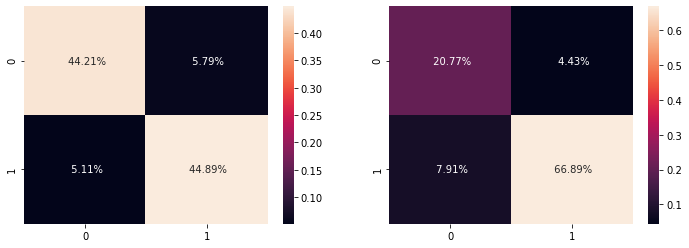

In [ ]:
#Confusion matrix for the train data
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion matrix for train and test set")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# confusion matrix for train set
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train/np.sum(cm_train), annot=True , fmt = ' .2%')
# help(metrics.confusion_matrix)

plt.subplot(1,2,2)
# confusion matrix for the test data
cm_test = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test/np.sum(cm_test), annot=True , fmt = ' .2%')

plt.show()


In [ ]:
# creating an ROC curve
# from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#for test set
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
#for train set
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate, true_positive_rate)

In [ ]:
# area under the curve
print ("for train set: ",roc_auc_tr)
print ("for test set: ",roc_auc)

for train set:  0.897884388935922
for test set:  0.897884388935922


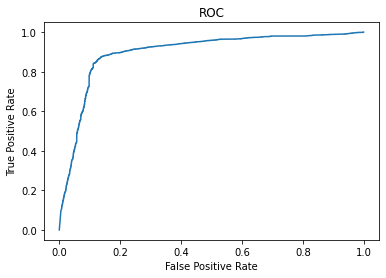

In [ ]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

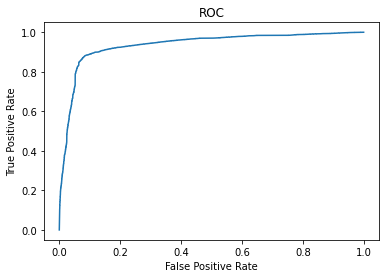

In [ ]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

In [ ]:
# storing the values in variables
#for test set
TN = cm_test[0, 0]
FP = cm_test[0, 1]
FN = cm_test[1, 0]
TP = cm_test[1, 1]
#For train set
TN_tr = cm_train[0, 0]
FP_tr = cm_train[0, 1]
FN_tr = cm_train[1, 0]
TP_tr = cm_train[1, 1]

In [ ]:
#specificity for test and train set.
specificity_tr = TN_tr / float(TN_tr + FP_tr)
print("specificity for train set: ",specificity_tr)
specificity = TN / float(TN + FP)
print("specificity for test set: ",specificity)

specificity for train set:  0.8841167169757079
specificity for test set:  0.8241927216811892


In [ ]:
#Calculating the Sensitivity for train and test set
sensitivity_tr = TP_tr / float(FN_tr + TP_tr)
print("sensitivity for train set: ",sensitivity)
sensitivity = TP / float(FN + TP)
print("sensitivity for test set: ",sensitivity)

sensitivity for train set:  0.9509710832973672
sensitivity for test set:  0.8942598187311178


The test sensitivity and specificity of the model without oversampling were 0.95 and 0.61 respectively. The application of oversampling model has resulted in an equal distribution of the binary labels. This has resulted in a jump in specificity by 0.21 with a slight decrease in the sensitivity by 0.06. From a business point of view, we can say that this is a better model as compared to the one that was built without oversampling.







In [ ]:
# Printing the classufication report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred))


report for train set
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     34785
           1       0.89      0.90      0.89     34785

    accuracy                           0.89     69570
   macro avg       0.89      0.89      0.89     69570
weighted avg       0.89      0.89      0.89     69570

report for test set
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      3902
           1       0.94      0.89      0.92     11585

    accuracy                           0.88     15487
   macro avg       0.83      0.86      0.84     15487
weighted avg       0.88      0.88      0.88     15487

